In [1]:
# import all tools we need

# Regular EDA (exploratory data analysis) and plotting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plot to inside notebook

%matplotlib inline 


# models from scikit-learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluations

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
df = pd.read_csv("data/train.csv")
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [3]:
# Lets find out how many each class are there
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

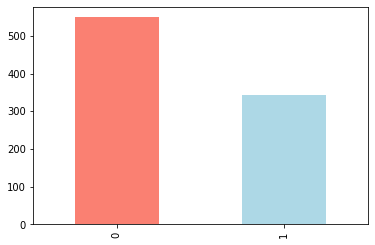

In [4]:
df["Survived"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:

pd.crosstab(df.Survived, df.Age)

Age,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,4.00,5.00,...,62.00,63.00,64.00,65.00,66.00,70.00,70.50,71.00,74.00,80.00
Survived,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,2,7,1,3,0,...,2,0,2,3,1,2,1,2,1,0
1,1,1,2,2,1,5,3,5,7,4,...,2,2,0,0,0,0,0,0,0,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df_tmp = df.copy()

In [11]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
pd.api.types.is_string_dtype(df_tmp["Sex"])

True

In [14]:
df_tmp.items()

<generator object DataFrame.items at 0x000001AA3F0BD740>

In [15]:
print(df_tmp.items())

<generator object DataFrame.items at 0x000001AA3F0BD970>


In [16]:
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Name
Sex
Ticket
Cabin
Embarked


In [17]:
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label]=content.astype("category").cat.as_ordered()

In [18]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    category
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    category
 11  Embarked     889 non-null    category
dtypes: category(5), float64(2), int64(5)
memory usage: 134.4 KB


In [19]:
df_tmp.Sex.cat.categories

Index(['female', 'male'], dtype='object')

In [20]:
df_tmp.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
# Export current tmp dataframe
df_tmp.to_csv("data/train_tmp.csv",
              index=False)

In [22]:
# Import preprocessed data
df_tmp = pd.read_csv("data/train_tmp.csv",
                     low_memory=False)

In [23]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

PassengerId
Survived
Pclass
Age
SibSp
Parch
Fare


In [24]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
# check for which numeric cols have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            print(label)

Age


In [26]:
# fill numeric rows with median

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
           # add binary column which tell us data was missing
            #df_tmp[label+"_is_missing"] = pd.isnull(content)
            # fill missing numeric values with median
            df_tmp[label] = content.fillna(content.median())

In [27]:
df_tmp.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
pd.crosstab(df_tmp.Survived, df_tmp.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


In [29]:
# check colums which aren't numeric

for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Name
Sex
Ticket
Cabin
Embarked


In [30]:
# turn categorical variables into numbers and fill missing

for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # add binary column to indicate whether sample had missing value
        #df_tmp[label+"_is_missing"] = pd.isnull(content)
        #Turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes+1

In [31]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int16  
 4   Sex          891 non-null    int8   
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int16  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int16  
 11  Embarked     891 non-null    int8   
dtypes: float64(2), int16(3), int64(5), int8(2)
memory usage: 55.8 KB


In [32]:
df_tmp.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [35]:
#Now that all of data is numeric as well as our dataframe has no missing values, we should be able to build a machine learning model.

#from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
#regressor = LinearRegression()

# Instantiate model
model = LinearRegression(n_jobs=-1)

# Fit the model
model.fit(df_tmp.drop("Survived", axis=1), df_tmp["Survived"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [36]:
model.score(df_tmp.drop("Survived", axis=1), df_tmp["Survived"])

0.4062135886042897

In [138]:
# Split data into training and validation
df_val = df_tmp[df_tmp.Sex == male]
df_train = df_tmp[df_tmp.Sex != male]

len(df_val), len(df_train)

NameError: name 'male' is not defined

In [146]:
# Split data into X & y
X_train, y_train = df_train.drop("Survived", axis=1), df_train.Survived
X_valid, y_valid = df_val.drop("Survived", axis=1), df_val.Survived

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((869, 11), (869,), (26, 11), (26,))

In [147]:
df_val

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,857,2,66.0,0,0,550,10.5000,0,3
54,55,0,1,621,2,65.0,0,1,30,61.9792,24,1
96,97,0,1,293,2,71.0,0,0,608,34.6542,13,1
116,117,0,3,179,2,70.5,0,0,461,7.7500,0,2
170,171,0,1,833,2,61.0,0,0,6,33.5000,19,3
252,253,0,1,783,2,62.0,0,0,32,26.5500,84,3
275,276,1,1,34,1,63.0,1,0,72,77.9583,114,3
280,281,0,3,228,2,65.0,0,0,291,7.7500,0,2
326,327,0,3,599,2,61.0,0,0,300,6.2375,0,3
366,367,1,1,846,1,60.0,1,0,5,75.2500,105,1


In [148]:
# create evaluation function (competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    calculates root mean squared error between prediction and true labels.
    """
    np.sqrt(mean_squared_log_error(y_test, y_preds))
    
    
# create function to evaluate model on a few different levels

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": np.sqrt(mean_squared_log_error(y_train, train_preds)),
              "Valid RMSLE": np.sqrt(mean_squared_log_error(y_valid, val_preds)),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

In [149]:
# change max_sample values

model = RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                              max_samples=500)

In [150]:
%%time

# cutting down on the max number of samples each estimators can see improves training time

model.fit(X_train, y_train)

Wall time: 261 ms


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=500, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [151]:
%%time
show_scores(model)

Wall time: 143 ms


{'Training MAE': 0.13936708860759495,
 'Valid MAE': 0.2623076923076923,
 'Training RMSLE': 0.14084933257057966,
 'Valid RMSLE': 0.24204258547034171,
 'Training R^2': 0.8308410583208764,
 'Valid R^2': 0.4516932330827069}

In [152]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters

rf_grid = {"n_estimators" : np.arange(10, 100, 10),
          "max_depth" : [None, 3, 5, 10],
          "min_samples_split" : np.arange(2, 20, 2),
          "min_samples_leaf" : np.arange(1, 20, 2),
          "max_features": [0.5, 1, "sqrt", "auto"],
          "max_samples": [500]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 25.2 s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   25.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [153]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 20,
 'min_samples_split': 4,
 'min_samples_leaf': 9,
 'max_samples': 500,
 'max_features': 0.5,
 'max_depth': None}

In [154]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 0.13118527042577677,
 'Valid MAE': 0.19230769230769232,
 'Training RMSLE': 0.25105449320364437,
 'Valid RMSLE': 0.3039651466350787,
 'Training R^2': 0.44743535396354395,
 'Valid R^2': 0.022556390977443663}

In [155]:
%%time

# Most ideal hyperparamters
ideal_model = RandomForestClassifier(n_estimators=20,
                                    min_samples_leaf=9,
                                    min_samples_split=4,
                                    max_features=0.5,
                                    max_depth=None,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42) # random state so our results are reproducible

# Fit the ideal model
ideal_model.fit(X_train, y_train)

Wall time: 59.8 ms


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=0.5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [156]:
show_scores(ideal_model)

{'Training MAE': 0.12197928653624857,
 'Valid MAE': 0.11538461538461539,
 'Training RMSLE': 0.2420853482801727,
 'Valid RMSLE': 0.23545039014903102,
 'Training R^2': 0.4862118203520672,
 'Valid R^2': 0.4135338345864662}

In [157]:
show_scores(rs_model)

{'Training MAE': 0.13118527042577677,
 'Valid MAE': 0.19230769230769232,
 'Training RMSLE': 0.25105449320364437,
 'Valid RMSLE': 0.3039651466350787,
 'Training R^2': 0.44743535396354395,
 'Valid R^2': 0.022556390977443663}

In [111]:
df_test = pd.read_csv("data/Test.csv",
                      low_memory=False)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [112]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
   
    
    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                #df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
    
        # Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
           # df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1
    
    return df

In [116]:
# Process the test data 
df_test = preprocess_data(df_test)
df_test.head()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    int16  
 3   Sex          418 non-null    int8   
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    int16  
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    int8   
 10  Embarked     418 non-null    int8   
dtypes: float64(2), int16(2), int64(4), int8(3)
memory usage: 22.6 KB


In [117]:
# We can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

set()

In [125]:
# Make predictions on the test data
test_preds = ideal_model.predict(df_test)

In [126]:
test_preds

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [139]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["PassengerId"] = df_test["PassengerId"]
df_preds["Survived"] = test_preds
df_preds

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [140]:
test_preds2 = model.predict(df_test)

In [141]:
test_preds2

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [142]:
df_preds2 = pd.DataFrame()
df_preds2["PassengerId"] = df_test["PassengerId"]
df_preds2["Survived"] = test_preds2
df_preds2

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [133]:
df_preds2.to_csv("data/Prediction_Submission2.csv",
              index=False)

In [143]:
df_preds2.to_csv("data/Prediction_Submission2.csv",
              index=False)

In [158]:
test_preds3 = model.predict(df_test)

In [162]:
test_preds3.dtype

dtype('float64')

In [166]:
test_pre = test_preds3.astype(int)

In [167]:
df_preds3 = pd.DataFrame()
df_preds3["PassengerId"] = df_test["PassengerId"]
df_preds3["Survived"] = test_pre
df_preds3

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [168]:
df_preds3.to_csv("data/Prediction_Submission3.csv",
              index=False)

In [169]:
test_preds4 = ideal_model.predict(df_test)

In [170]:
test_preds4

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [171]:
df_preds4 = pd.DataFrame()
df_preds4["PassengerId"] = df_test["PassengerId"]
df_preds4["Survived"] = test_preds4
df_preds4

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [173]:
df_preds4.to_csv("data/Prediction_Submission4.csv",
              index=False)